In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [98]:
df=pd.read_csv(r'D:\Covid19Data\processedData\2020-03-30.csv')

In [99]:
df=df[['clean_text']]

In [100]:
temp=pd.DataFrame()

In [101]:
temp['word_list'] = df['clean_text'].apply(lambda x:str(x).split())

In [102]:
# def remove_stopword(x):
#     return [y for y in x if y not in stopwords.words('english')]
# temp['word_list'] = temp['word_list'].apply(lambda x:remove_stopword(x))

In [103]:
# top = Counter([item for sublist in temp['word_list'] for item in sublist])
# selectedWords=pd.DataFrame(top.most_common(20))
# selectedWords=selectedWords.iloc[1:,:]
# selectedWords.columns=['Common_words','count']

In [104]:
selectedWords

,Common_words,count
1,21,1073
2,corona,1007
3,days,901
4,india,703
5,people,662
6,home,659
7,stay,632
8,please,518
9,covid,504
10,&,496


In [105]:
allWords=''.join([tweet for tweet in df['clean_text']])
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im","thi","ha"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=200, 
                    height=200,
                    mask = mask,
                    colormap=matplotlib.cm.inferno)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    return wordcloud
d = 'D:\\SmartINternz\\twitter_most_common_words\\'

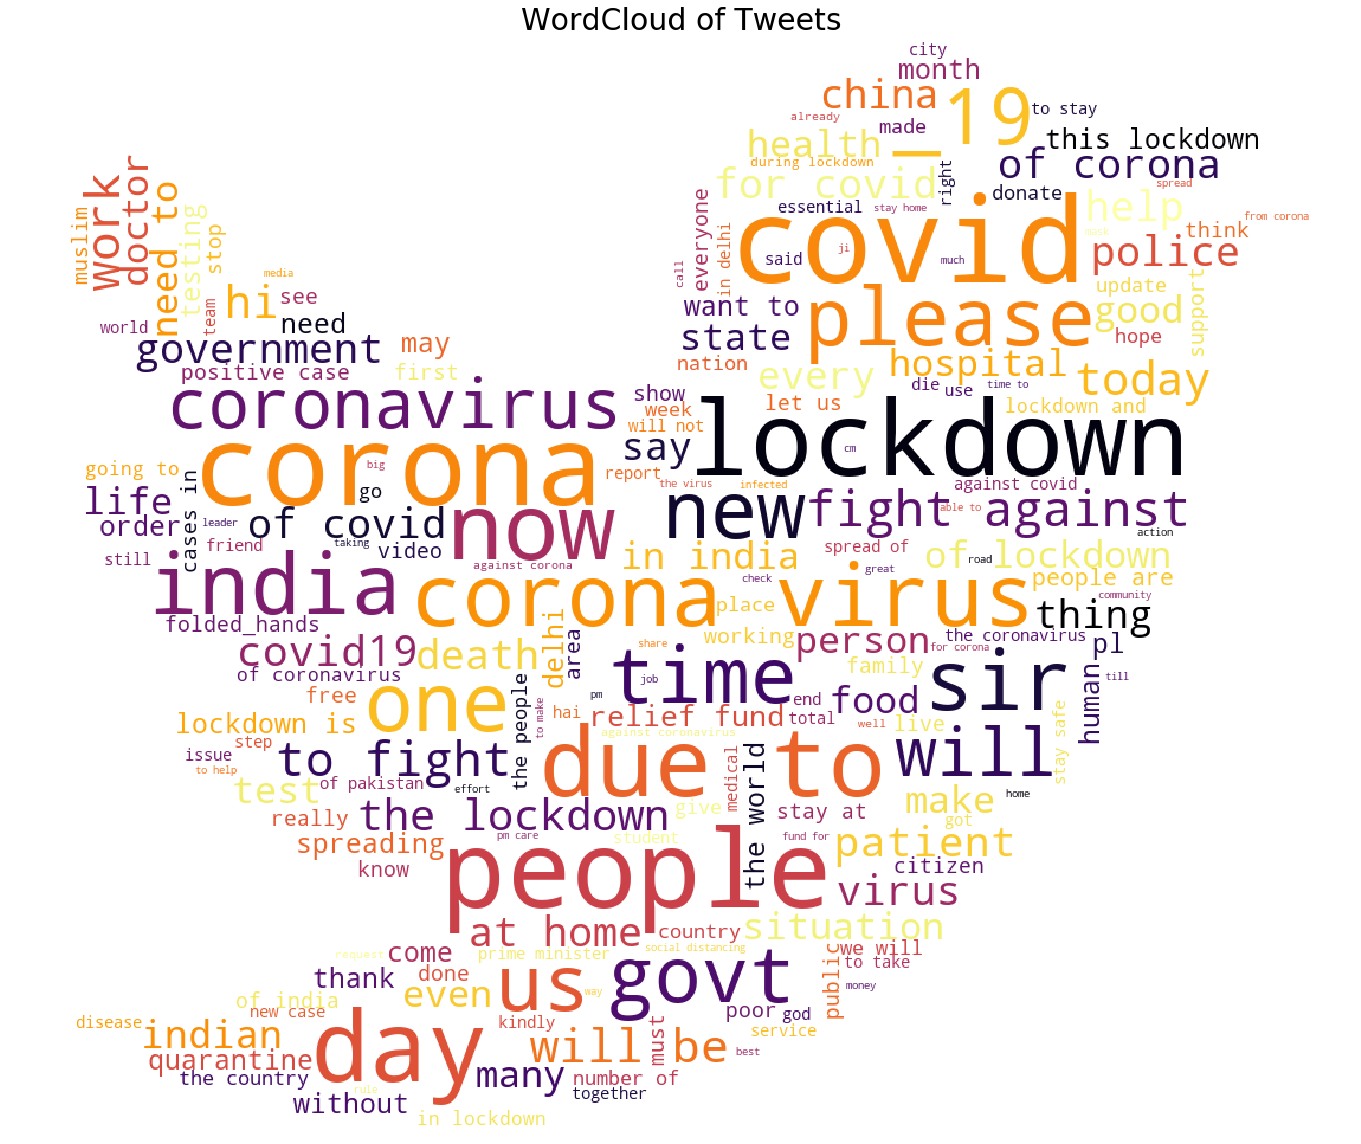

In [106]:
pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
twitterwordcloud=plot_wordcloud(allWords,mask=pos_mask,color='white',max_font_size=100,title_size=30,title="WordCloud of Tweets")

In [67]:
twitterwordcloud.to_file('date1.png')